<a href="https://colab.research.google.com/github/YeabsiraNigusse/Coursera-Deep-Learning-Specialization/blob/main/Course%202/Week%201/Regularization/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

In this notebook we will study what regularization is, were we can use it, what the types are and what it can do for us. let us go!

In [3]:
from google.colab import files
update = files.upload()

Saving data.mat to data.mat
Saving test_catvnoncat.h5 to test_catvnoncat.h5
Saving train_catvnoncat.h5 to train_catvnoncat.h5


In [5]:
!pip install dlai_tools

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
from testCases import *
from public_tests import *

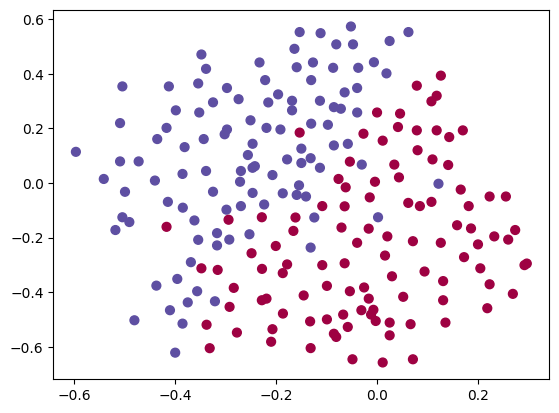

In [7]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

- L2 regularization -- functions: "compute_cost_with_regularization()" and "backward_propagation_with_regularization()"
- Dropout -- functions: "forward_propagation_with_dropout()" and "backward_propagation_with_dropout()"

In [8]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.

    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """

    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]

    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)

        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)

        # Backward propagation.
        assert (lambd == 0 or keep_prob == 1)   # it is possible to use both L2 regularization and dropout,
                                                # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724216
Cost after iteration 20000: 0.13851642423254343


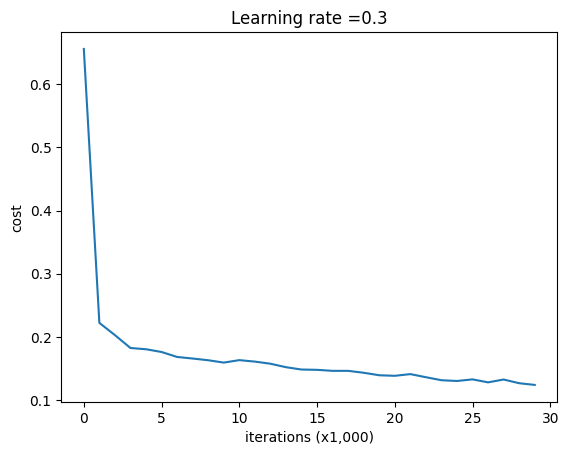

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [9]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

- in the above code the term `keep_prob` denotes that the probability of keeping a neuron active. For example, if keep_prob is set to 0.8, it means that each neuron has an 80% chance of being kept active during training.
- The most common forms of regularization in neural networks are L1 regularization and L2 regularization. The regularization term is added to the loss function, and a hyperparameter, often denoted as `λ (lambda)`, controls the strength of the regularization. The larger the λ, the stronger the regularization effect.